<div align="center">

  <a href="https://ultralytics.com/yolov5" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov5/v70/splash.png"></a>

 <a href="http://www.upv.es/contenidos/CGANDIA/" target="_blank">
    <img width="1024", src="https://www.upv.es/perfiles/pas-pdi/imagenes/marca_UPV_principal_color300.png"></a>


</div>

#TFG @AUTHOR: [BERKAY SULEYMAN DIK](https://github.com/berkod-ai)

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
!nvidia-smi

Sat Aug 26 12:05:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%cd /content/gdrive/MyDrive/TFG

/content/gdrive/MyDrive/TFG


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/gdrive/MyDrive/TFG


# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [ ]:
#!git clone https://github.com/ultralytics/yolov5  # clone
%cd {HOME}/YOLOv5
%pip install -qr requirements.txt comet_ml  # install

import torch
import os
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


# Train

<p align=""><a href="https://bit.ly/ultralytics_hub"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/im/integrations-loop.png"/></a></p>

- **Training Results** are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.
<br>




In [ ]:
#@title Select YOLOv5 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'ClearML', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'ClearML':
  %pip install -q clearml
  import clearml; clearml.browser_login()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train

Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Valid Comet API Key saved in /root/.comet.config (set COMET_CONFIG to change where it is saved).


In [ ]:
#!mkdir {HOME}/datasets
%cd {HOME}/YOLOv5/datasets

/content/gdrive/MyDrive/TFG/YOLOv5/datasets


In [ ]:
!pip install roboflow

from roboflow import Roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=1f5bb6c2400d154b869ce814c19685920e3ffbb390e9ca49f64e086b3bf487c8
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: idna
    Found 

## Load Dataset2: mp-d2

In [ ]:
#%cd /content/yolov5
#after following the link above, recieve python code with these fields filled in
#!pip install roboflow

#from roboflow import Roboflow
rf = Roboflow(api_key="aiqnl80uq2Vjbz5i2YM7")
project = rf.workspace("berkod-ai").project("mp-d2")
dataset = project.version(11).download("yolov5")

[Errno 2] No such file or directory: '/content/yolov5'
/content/gdrive/MyDrive/TFG/YOLOv5/datasets
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to mp--d2-11 in yolov5pytorch:: 100%|██████████| 3070/3070 [00:20<00:00, 152.17it/s]


In [ ]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat {dataset.location}/data.yaml

names:
- stray_cat
- stray_dog
nc: 2
roboflow:
  license: CC BY 4.0
  project: mp-d2
  url: https://universe.roboflow.com/berkod-ai/mp-d2/dataset/11
  version: 11
  workspace: berkod-ai
test: ../test/images
train: mp--d2-11/train/images
val: mp--d2-11/valid/images


## Train Our Custom YOLOv5 model

Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** Our dataset locaiton is saved in the `dataset.location`
- **weights:** specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint.
- **cache:** cache images for faster training

In [ ]:
%cd {HOME}/YOLOv5

/content/gdrive/MyDrive/TFG/YOLOv5


In [ ]:
# train yolov5s on custom data for 100 epochs
# time its performance
%%time
!python train.py --img 640 --epochs 90 --data ./mp--d2-11/data.yaml --weights yolov5l.pt --cache --name yolov5_results_v2


train: weights=yolov5l.pt, cfg=, data=./mp--d2-11/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=90, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5_results_v2, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015,

/content/gdrive/MyDrive/TFG/YOLOv5


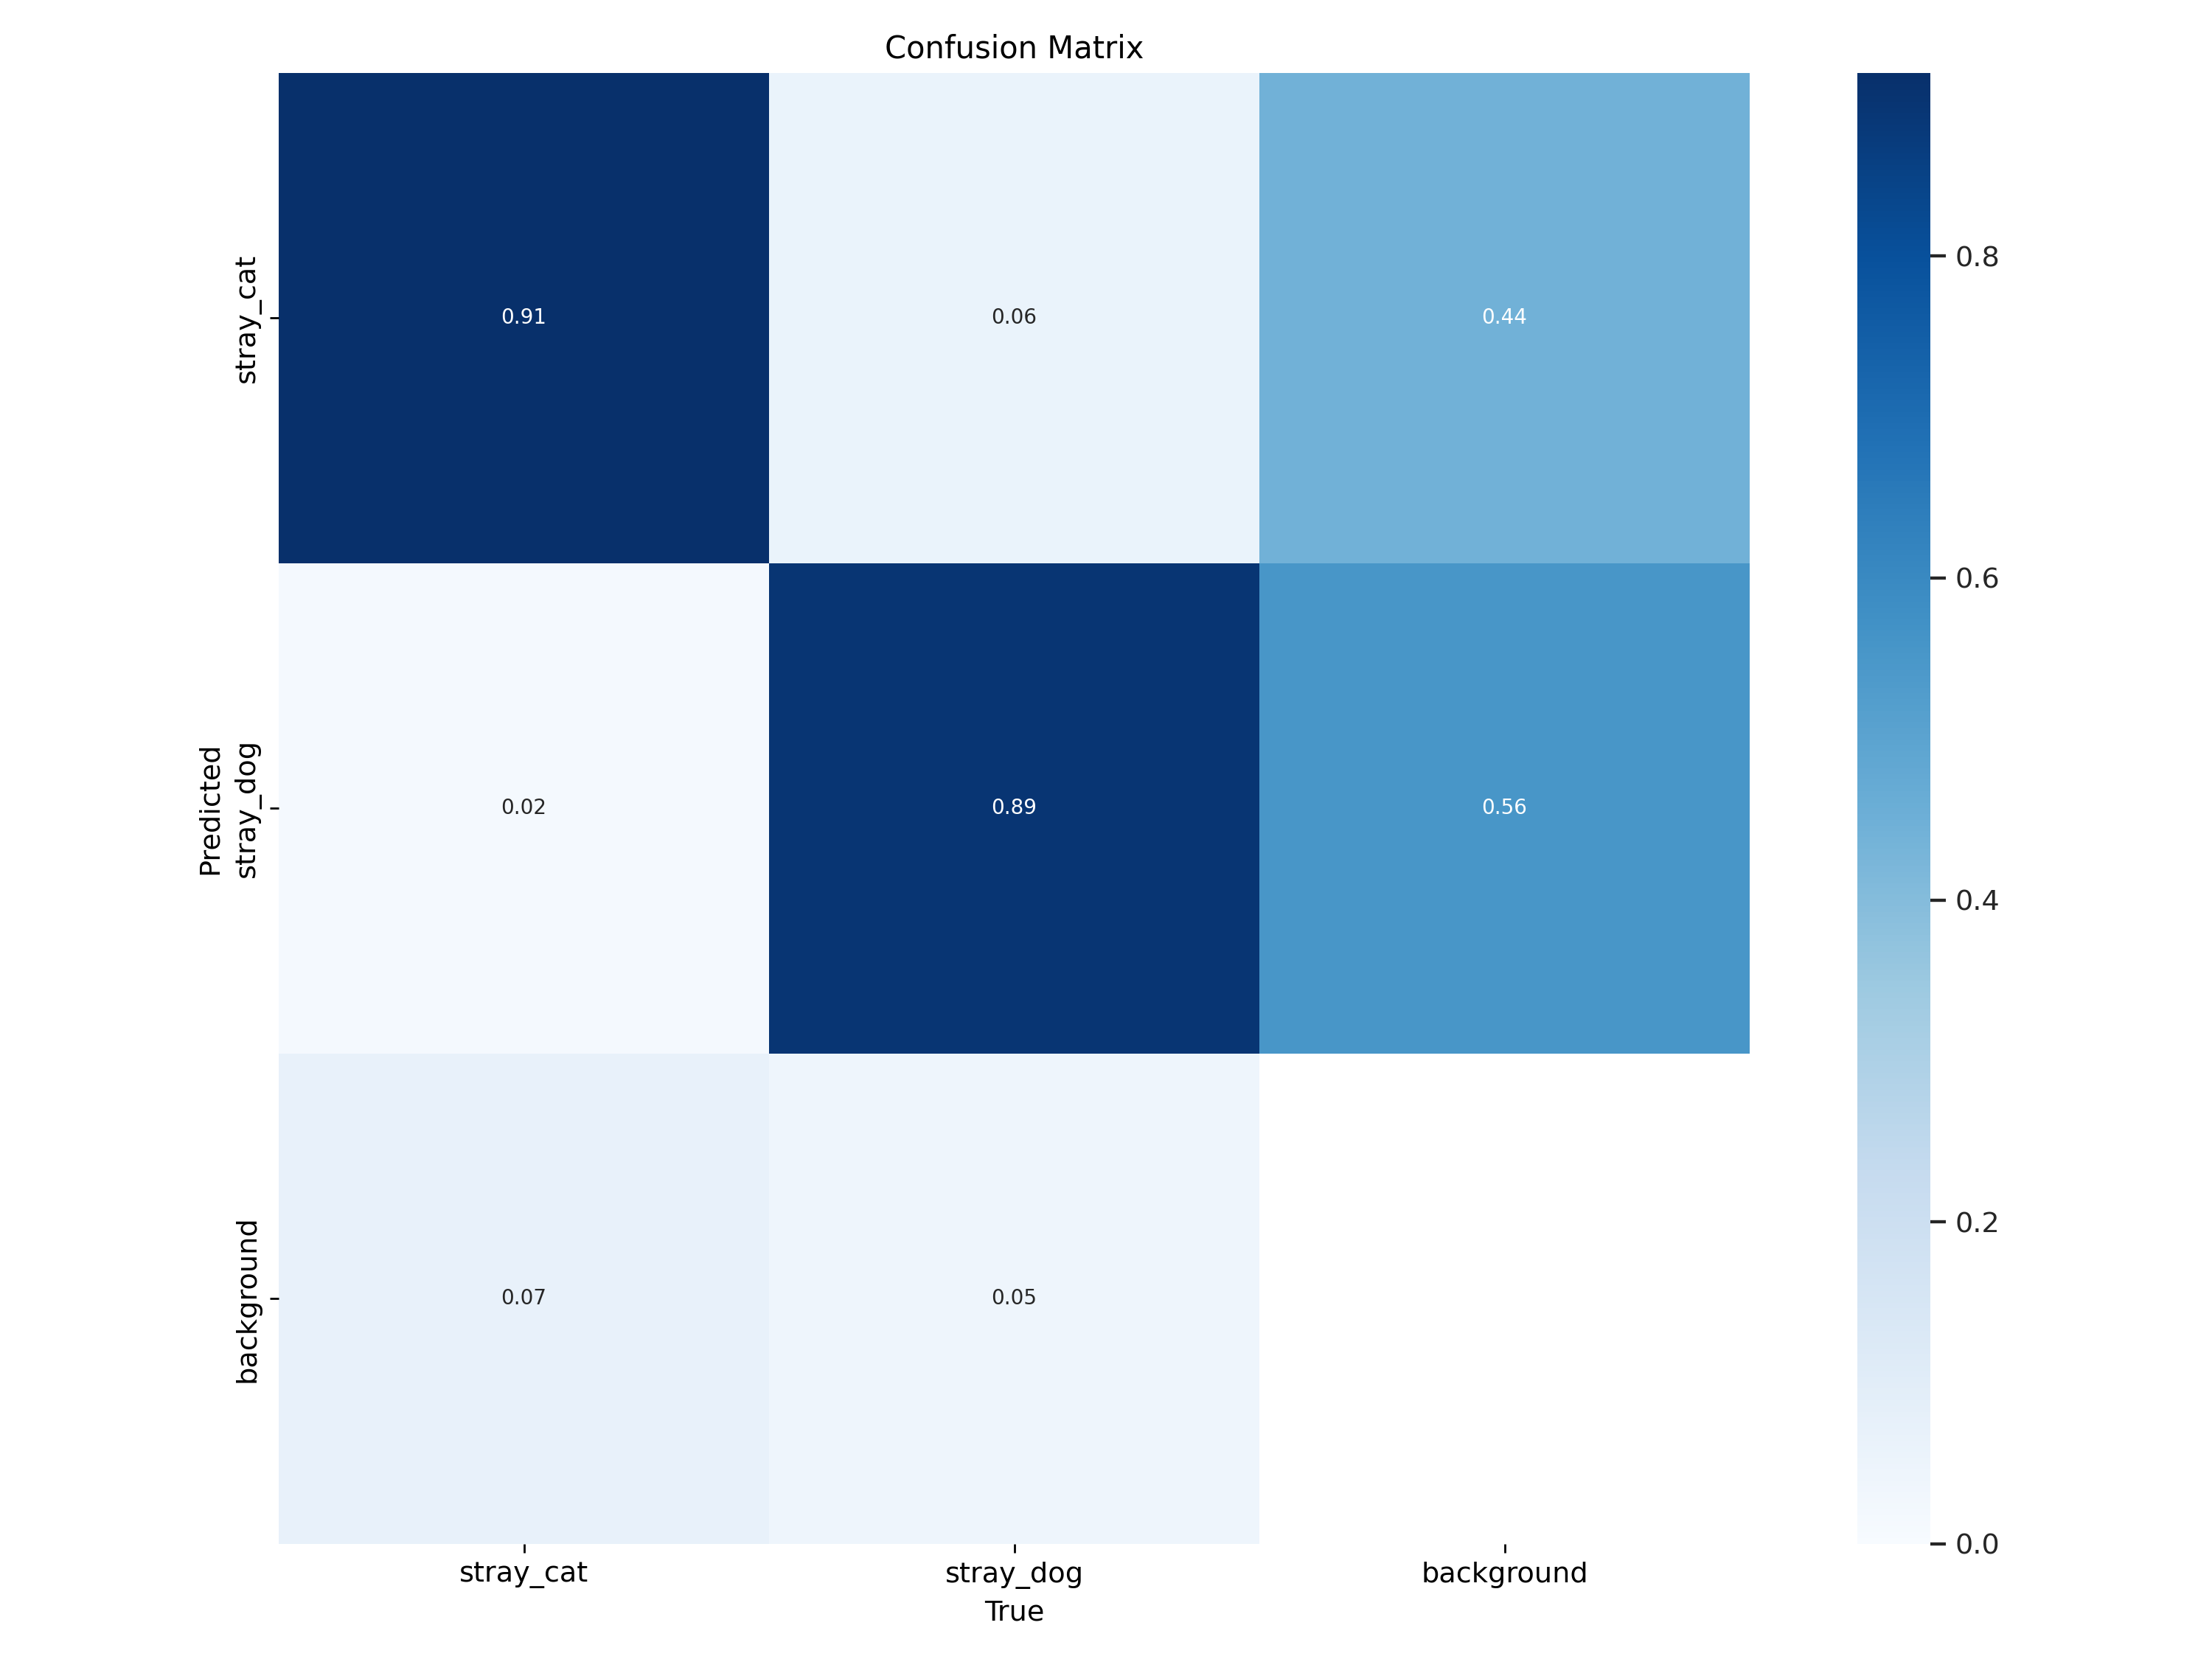

In [ ]:
%cd {HOME}/YOLOv5
from IPython.display import display, Image
Image(filename='./runs/train/yolov5_results_v24/confusion_matrix.png', width=600)

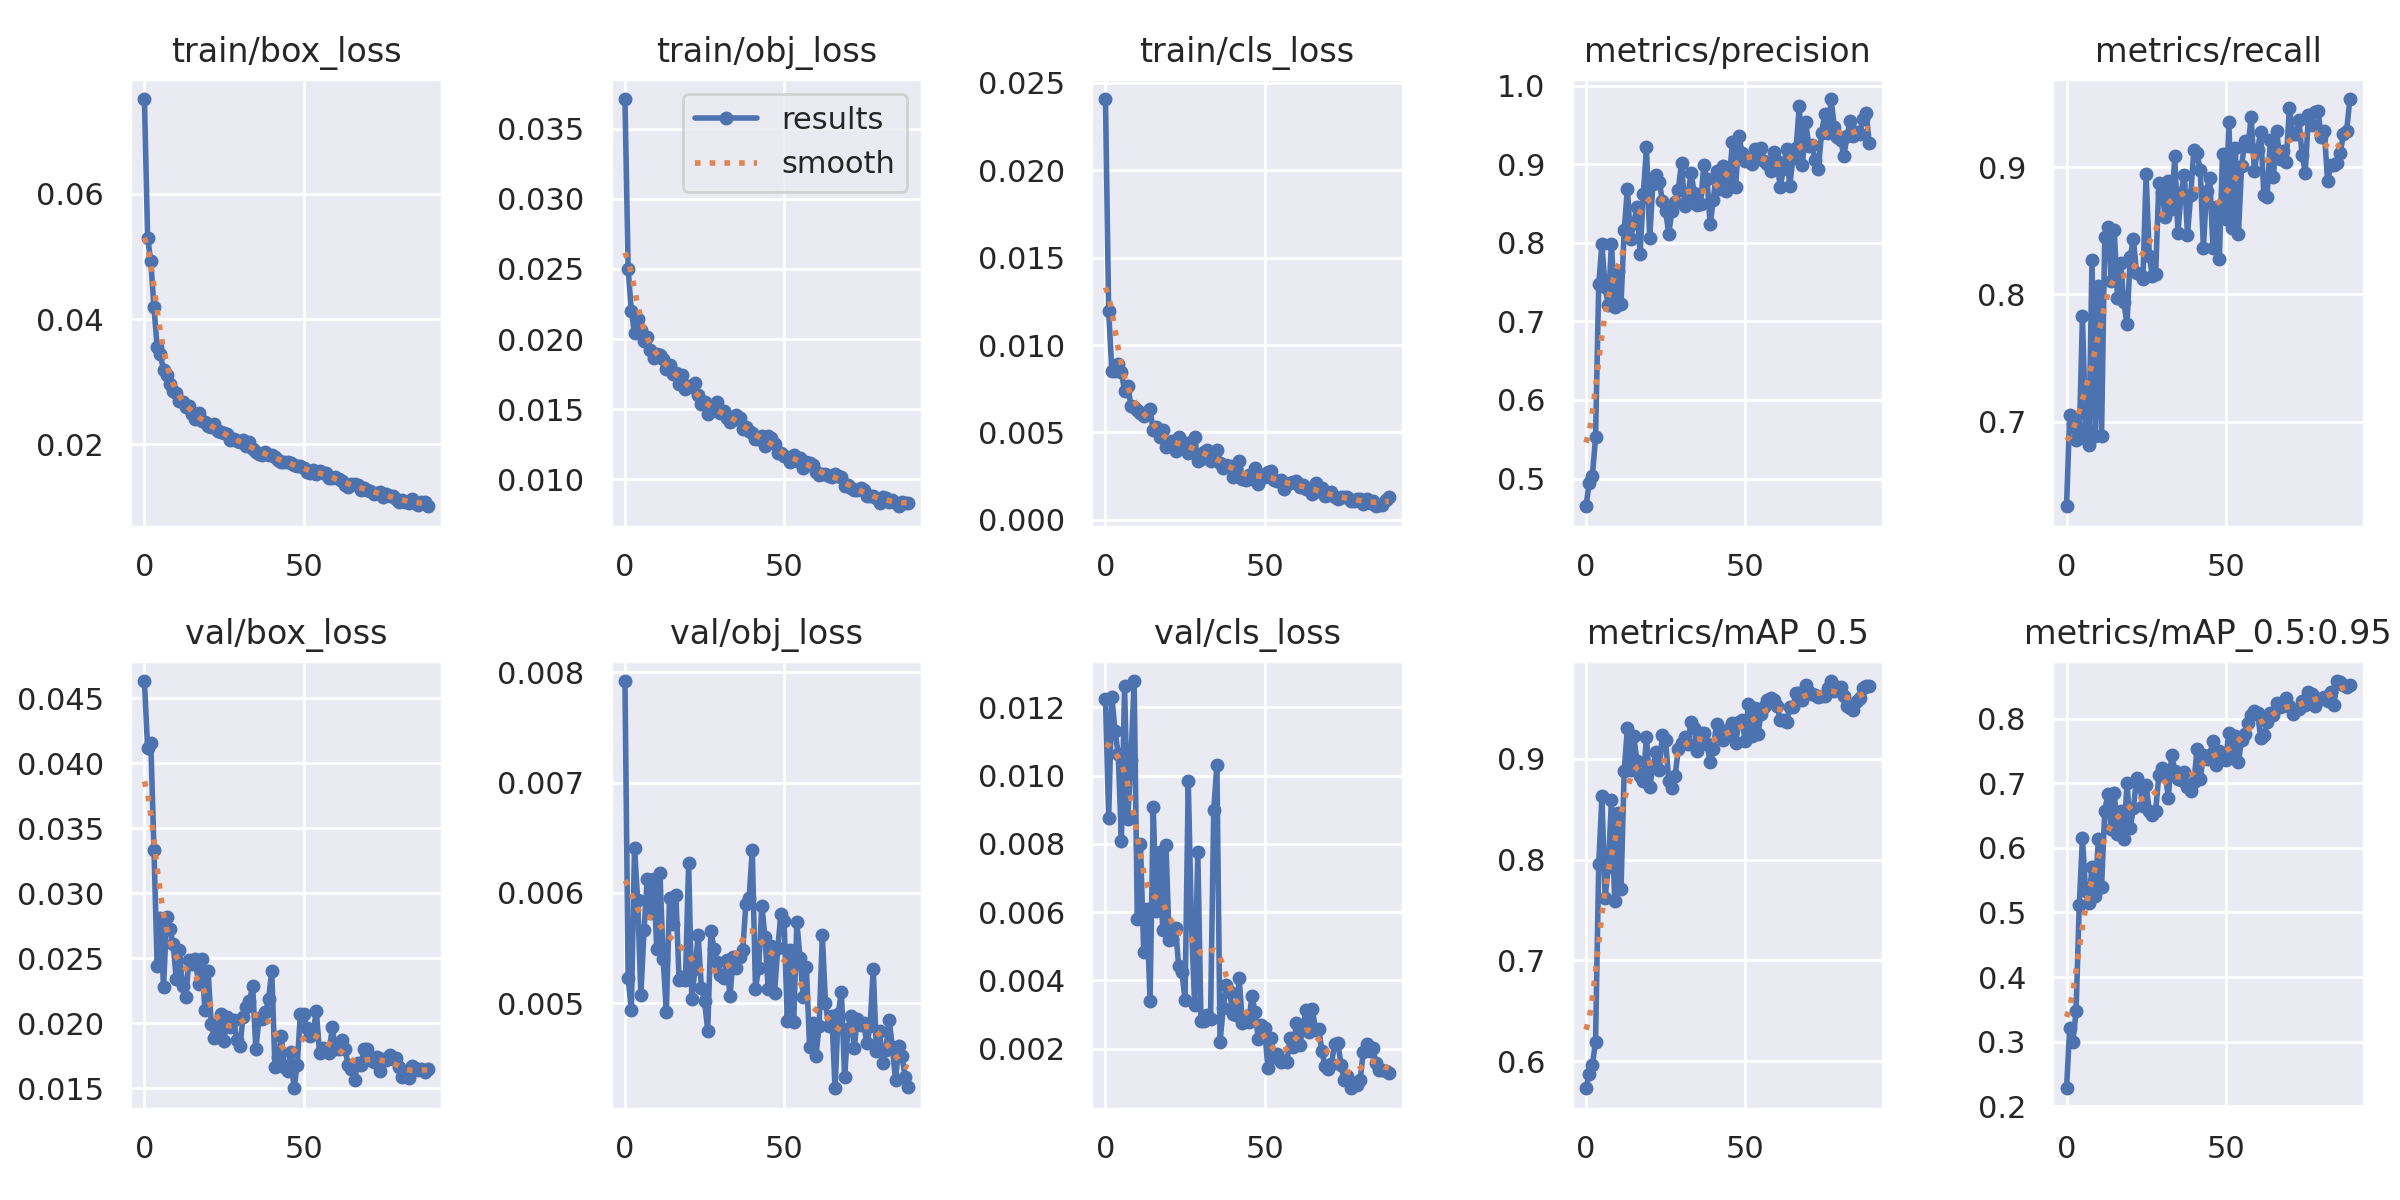

In [ ]:
Image(filename='./runs/train/yolov5_results_v24/results.png', width=600)

# 4. Visualize

In [ ]:
"""
!pip install comet_ml --quiet # 1. install
!export COMET_API_KEY=E7BDmW4WOvir5ngDNtkYaBCl0  # 2. paste API key
!env COMET_LOG_PER_CLASS_METRICS=true python train.py --img 640 --epochs 3 --data data.yaml --weights yolov5s.pt  # 3. train
"""

## Visualize Test images

In [ ]:
#!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 640 --conf 0.4 --source ../yolov5/TFG-3/test/images
!python detect.py --weights ./runs/train/yolov5_results_v24/weights/best.pt --img 640 --conf 0.35 --source {HOME}/testing/test6.jpg

detect: weights=['./runs/train/yolov5_results_v24/weights/best.pt'], source=/content/gdrive/MyDrive/TFG/testing/test6.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46113663 parameters, 0 gradients, 107.7 GFLOPs
image 1/1 /content/gdrive/MyDrive/TFG/testing/test6.jpg: 448x640 2 stray_dogs, 50.1ms
Speed: 0.7ms pre-process, 50.1ms inference, 69.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp6


In [ ]:
from IPython.display import Image, display

Image(filename='./runs/detect/exp6/test6.jpg', width=600)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#display inference on ALL test images
!python detect.py --weights ./runs/train/yolov5_results_v24/weights/best.pt --img 640 --conf 0.35 --source ./mp--d2-11/test/images

detect: weights=['./runs/train/yolov5_results_v24/weights/best.pt'], source=./mp--d2-11/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46113663 parameters, 0 gradients, 107.7 GFLOPs
image 1/91 /content/gdrive/MyDrive/TFG/YOLOv5/mp--d2-11/test/images/00000036_jpg.rf.8cbc80aa6bd27a59aa52d66d53ef9282.jpg: 640x640 1 stray_cat, 49.5ms
image 2/91 /content/gdrive/MyDrive/TFG/YOLOv5/mp--d2-11/test/images/00000047_jpg.rf.de03eeae93ae22c2019393eb5e6e4240.jpg: 640x640 1 stray_cat, 41.4ms
image 3/91 /content/gdr

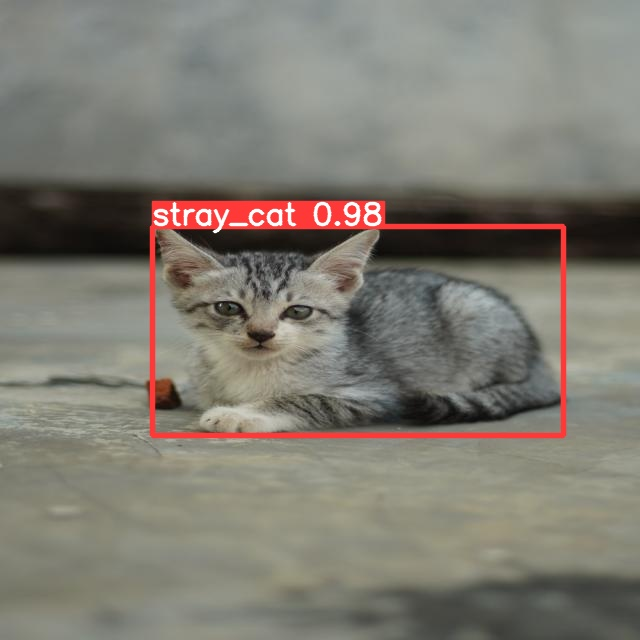

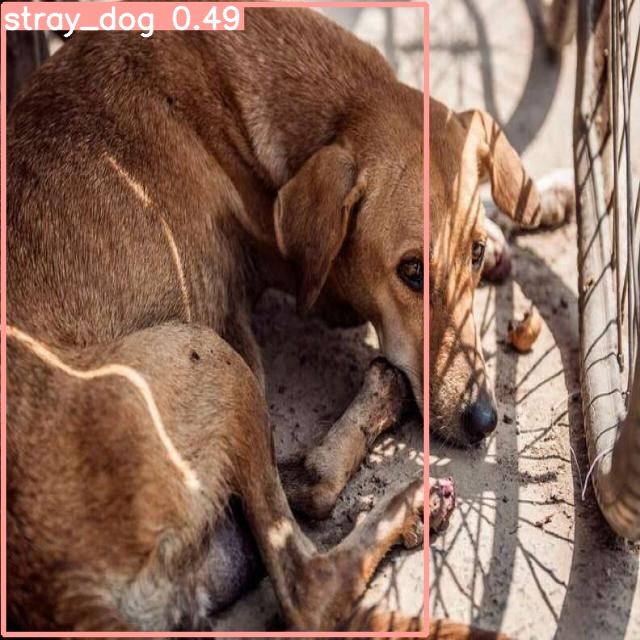

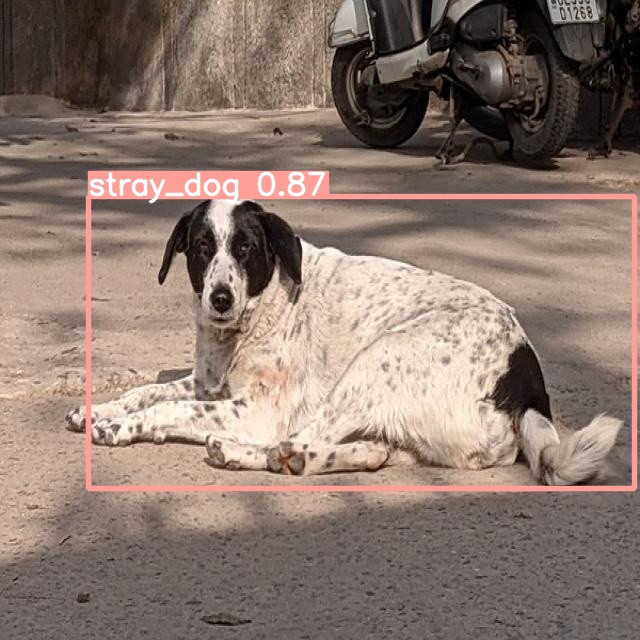

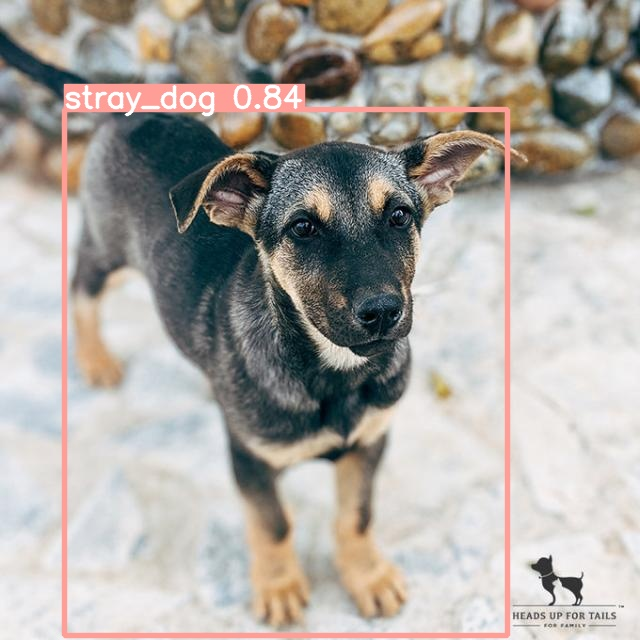

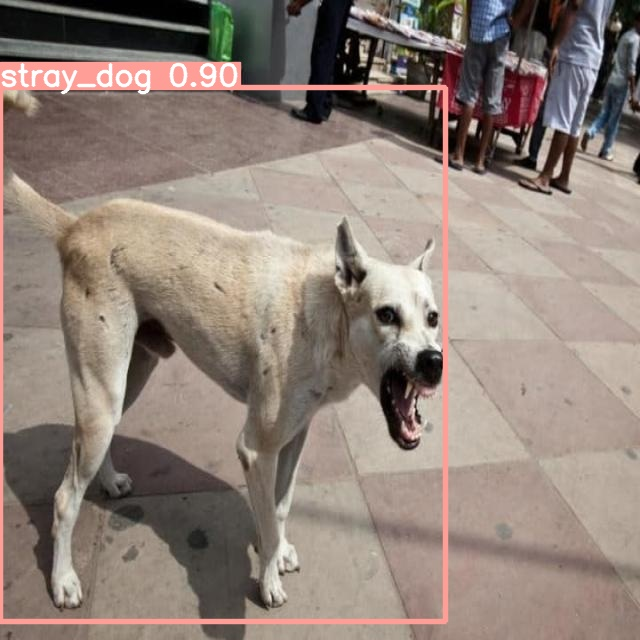

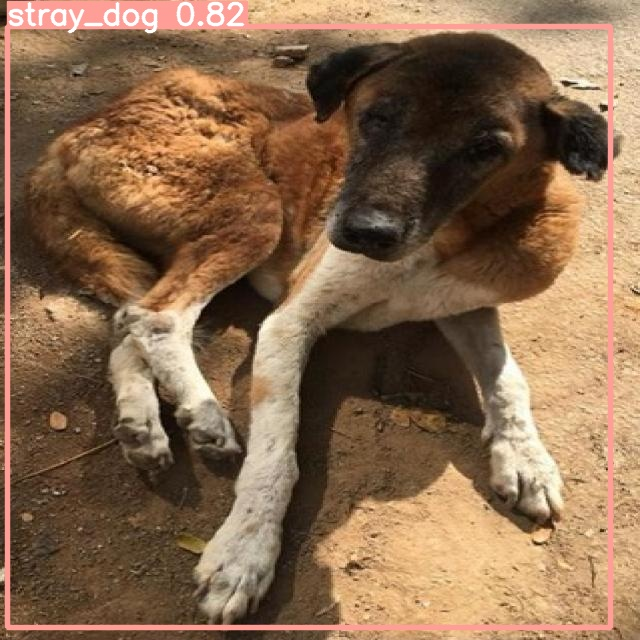

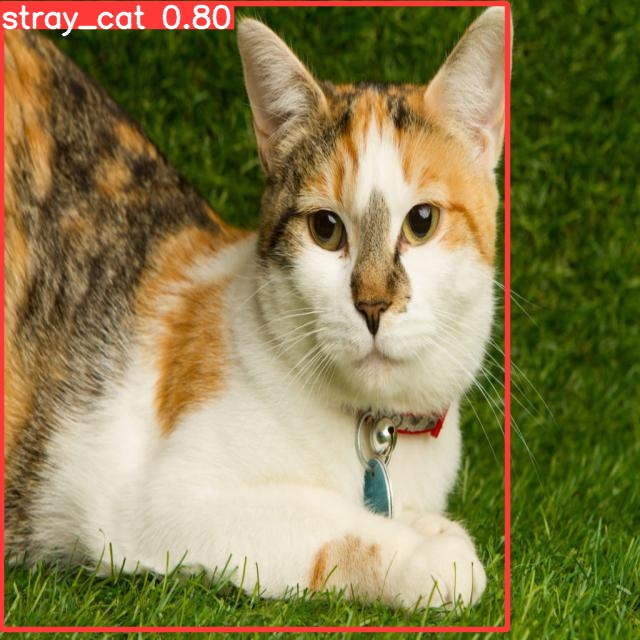

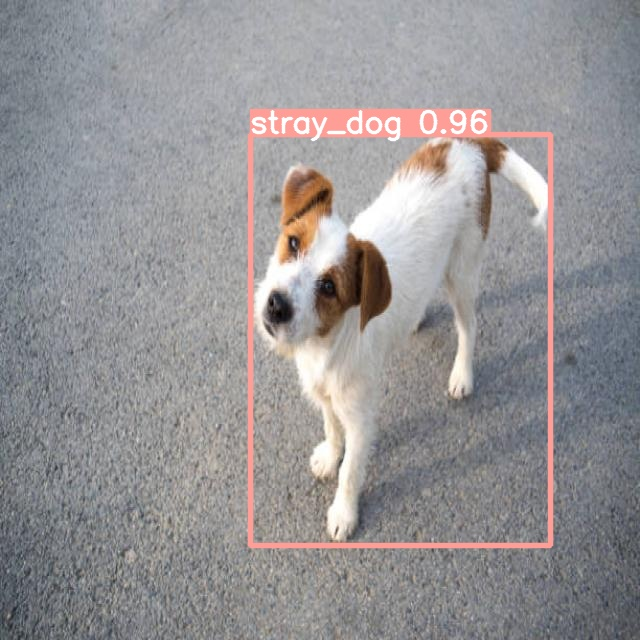

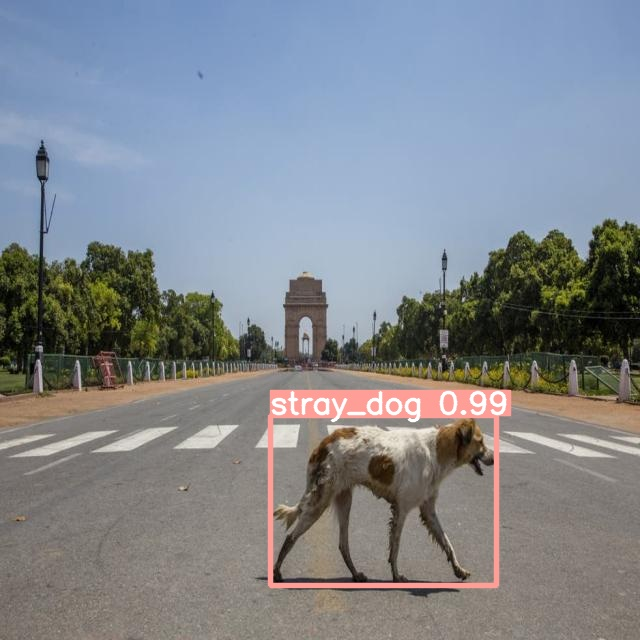

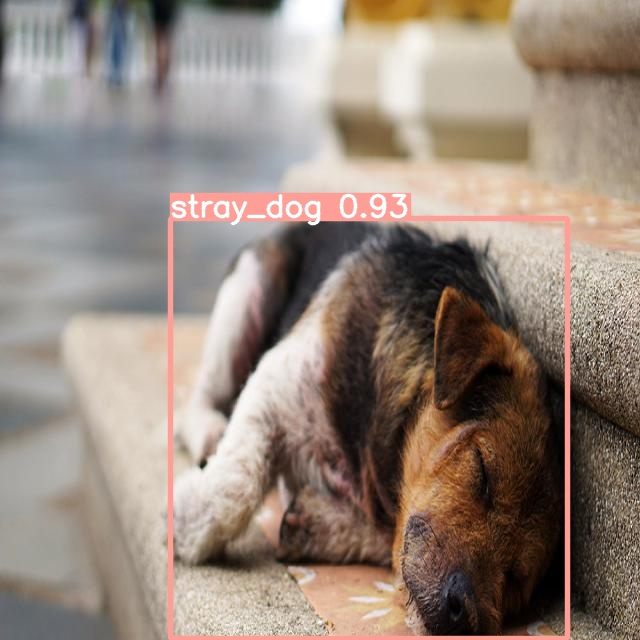

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('./runs/detect/exp8/*.jpg')[20:30]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!python val.py --weights ./runs/train/yolov5_results_v24/weights/best.pt --data ./mp--d2-11/data.yaml --img 640

val: data=./mp--d2-11/data.yaml, weights=['./runs/train/yolov5_results_v24/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46113663 parameters, 0 gradients, 107.7 GFLOPs
val: Scanning /content/gdrive/MyDrive/TFG/YOLOv5/mp--d2-11/valid/labels.cache... 99 images, 8 backgrounds, 0 corrupt: 100% 99/99 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 4/4 [00:06<00:00,  1.70s/it]
                   all         99        124       0.94      0.904      0.958      0.856
             stray_cat         99         58      0.914      0.911      0.961    

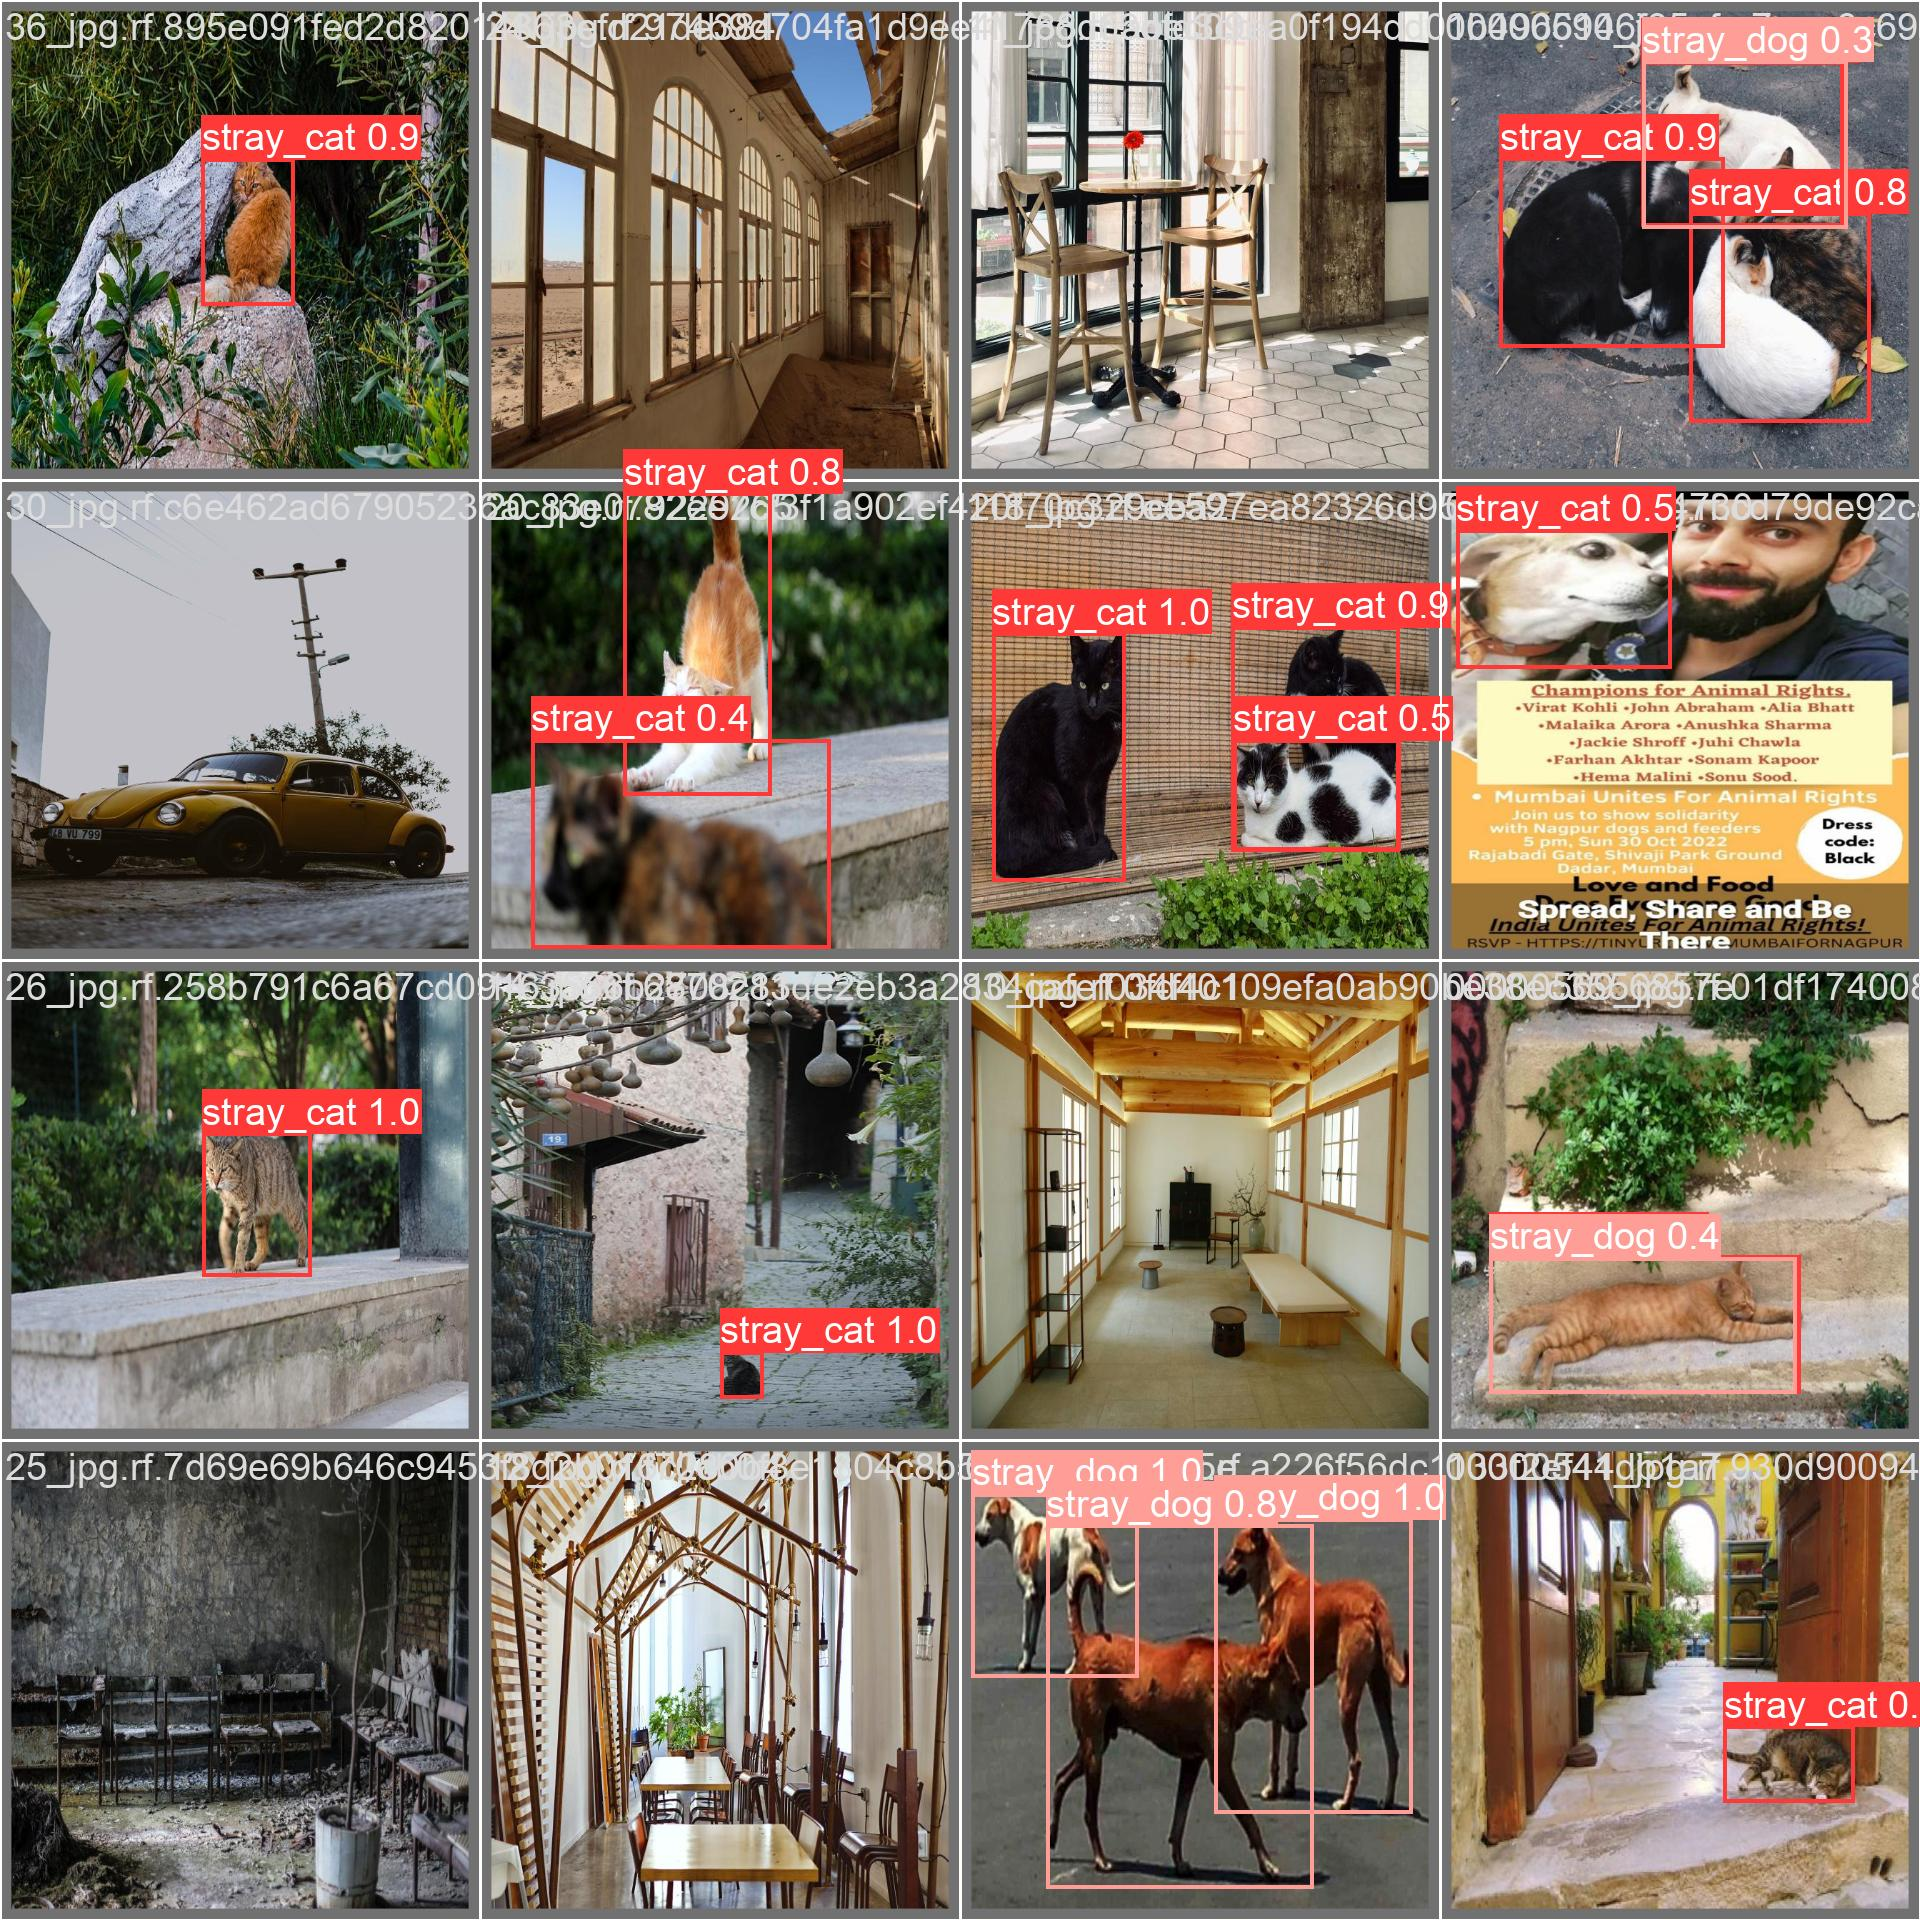

In [ ]:
Image(filename='./runs/train/yolov5_results_v24/val_batch1_pred.jpg', width=600)